In [141]:
from scipy.stats import ttest_ind, ttest_rel
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Laborforce

In [20]:
data = pd.read_csv('labor.txt', engine='python', sep="\t")

1)

In [21]:
ttest_ind(data['x1968'], data['x1972'])

Ttest_indResult(statistic=-1.4958516232927113, pvalue=0.1434082480427441)

2)

In [22]:
ttest_rel(data['x1968'], data['x1972'])

TtestResult(statistic=-2.457703815601802, pvalue=0.024352597586836354, df=18)

3)

Paired t test is best

4)

In [30]:
(data['x1972'] - data['x1968']).mean() * 100

3.3684210526315783

### Brain

In [64]:
data = open("brainweight.txt", "r").read().splitlines()

In [93]:
data = open("brainweight.txt", "r").read().splitlines()
df = pd.DataFrame([d.split() for d in data][1:])
df.rename(columns={0: [d.split() for d in data][0][0],
                    1: [d.split() for d in data][0][1],
                    2: [d.split() for d in data][0][2]}, inplace=True)
df = df.astype({'art': str, 'body': float, 'brain': float})

1)

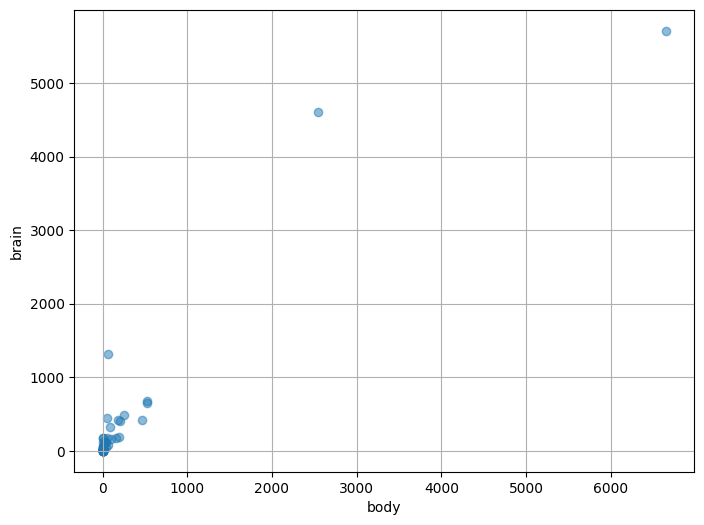

In [103]:
plt.figure(figsize=(8, 6))
plt.scatter(df["body"].to_list(), df["brain"].to_list(), alpha=0.5)
plt.xlabel("body")
plt.ylabel("brain")
plt.grid(True)
plt.show()

2)

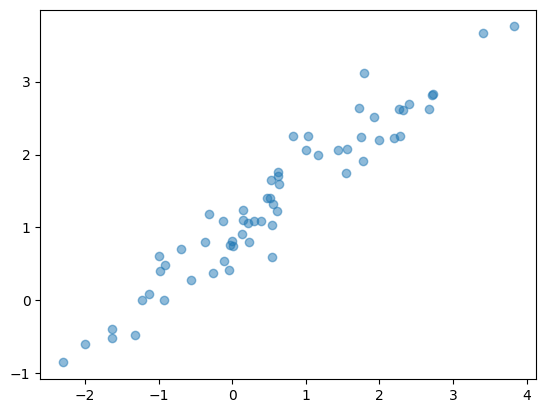

In [118]:
body = df["body"].to_list()
brain = df["brain"].to_list()
logged_brain = np.log10(brain)
logged_body = np.log10(body)

plt.scatter(logged_body, logged_brain, alpha=0.5)
plt.show()

In [119]:
np.corrcoef(logged_body, logged_brain)[1][0]

0.9595747583709802

3)

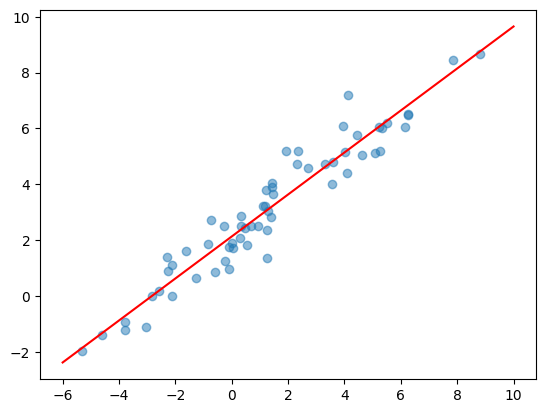

In [125]:
logged_brain = np.log(brain)
logged_body = np.log(body).reshape(-1, 1)

LinearModel = LinearRegression().fit(logged_body, logged_brain)
xs = np.linspace(-6, 10).reshape(-1, 1)
predictions = LinearModel.predict(xs)

plt.scatter(logged_body, logged_brain, alpha=0.5)
plt.plot(xs, predictions, color="red")
plt.show()

4)

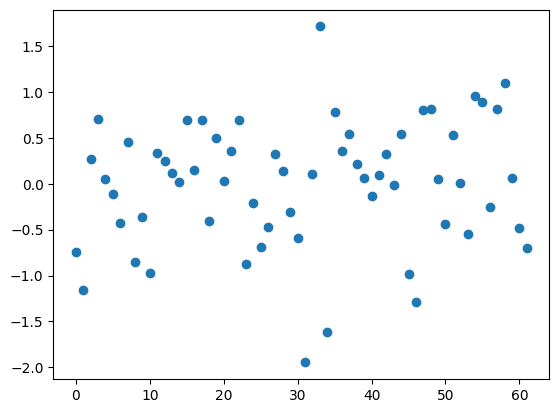

In [140]:
bo = np.array([3]).reshape(-1, 1)

residuals = [LinearModel.predict(np.array([bo]).reshape(-1, 1))[0] - br for bo, br in zip(logged_body, logged_brain)]
plt.scatter(list(range(len(residuals))), residuals)

5)

In [143]:
y_true = logged_brain
y_pred = [LinearModel.predict(np.array([bo]).reshape(-1, 1))[0] for bo in logged_body]
r2_score(y_true, y_pred)

0.9207837169027255

### Calcium

In [205]:
import pylab as py 
import scipy.stats as stats

In [157]:
data = open("calcium.txt", "r").read().splitlines()
df = pd.DataFrame([d.split() for d in data][1:])
df.rename(columns={0: [d.split() for d in data][0][0],
                    1: [d.split() for d in data][0][1],
                    2: [d.split() for d in data][0][2],
                    3: [d.split() for d in data][0][3]}, inplace=True)
df = df.astype({'Treatment': str, 'Begin': int, 'End': int, 'Decrease': int})
df_calcium = df[df['Treatment'] == 'Calcium']
df_placebo = df[df['Treatment'] == 'Placebo']

1)

Pooled two sided t test

2)

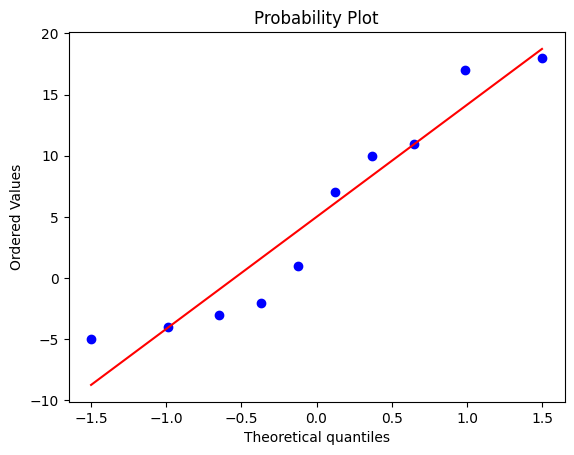

In [178]:
data_points = df_calcium["Decrease"].values
  
stats.probplot(df_calcium["Decrease"].values, dist='norm', plot=plt)
plt.show()

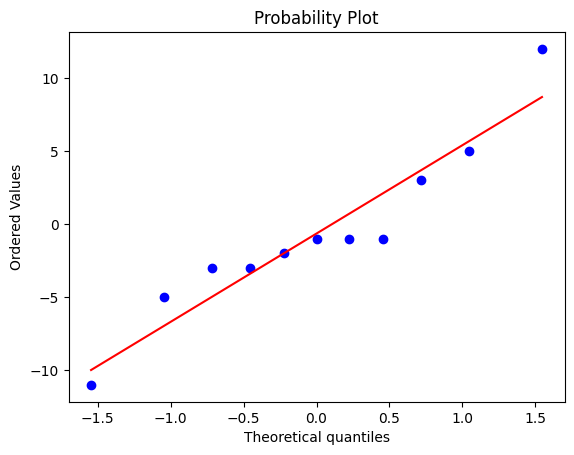

In [179]:
stats.probplot(df_placebo["Decrease"].values, dist='norm', plot=plt)
plt.show()

3)

In [196]:
statistic, p_value = stats.levene(df_calcium["Decrease"].values, df_placebo["Decrease"].values)

# Display the results
print("Test Statistic:", statistic)
print("P-value:", p_value)

Test Statistic: 4.651095419156254
P-value: 0.04405575600982997


4)

/var/folders/pl/7f1cr2657p3bnpdt3bnm_9w00000gn/T/ipykernel_9440/2142814820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calcium["Group"] = "Calcium"
/var/folders/pl/7f1cr2657p3bnpdt3bnm_9w00000gn/T/ipykernel_9440/2142814820.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_placebo["Group"] = "Placebo"


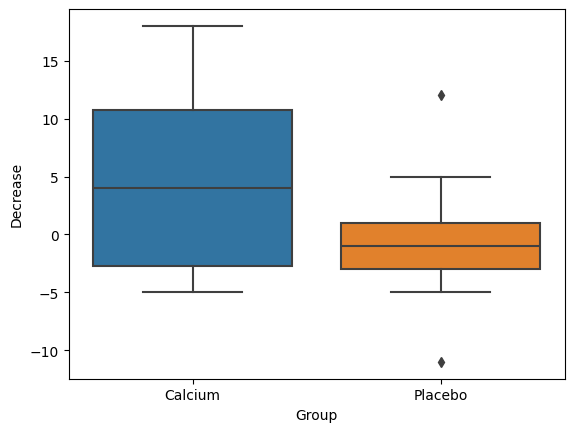

In [195]:
import seaborn as sns

df_calcium["Group"] = "Calcium"
df_placebo["Group"] = "Placebo"

combined_df = pd.concat([df_calcium, df_placebo])
sns.boxplot(x="Group", y="Decrease", data=combined_df)
plt.show()

5)

In [197]:
statistic, p_value = stats.ttest_ind(df_calcium["Decrease"].values, df_placebo["Decrease"].values)

# Display the results
print("Test Statistic:", statistic)
print("P-value:", p_value)

Test Statistic: 1.7498785614053636
P-value: 0.09627286568666871


In [199]:
df_calcium["Decrease"].values, df_placebo["Decrease"].values

(array([ 7, -4, 18, 17, -3, -5,  1, 10, 11, -2]),
 array([ -1,  12,  -1,  -3,   3,  -5,   5,  -2, -11,  -1,  -3]))

6)

In [200]:
# Rank sum test
statistic, p_value = stats.ranksums(df_calcium["Decrease"].values, df_placebo["Decrease"].values)
print("Test Statistic:", statistic)
print("P-value:", p_value)

Test Statistic: 1.1266860643512486
P-value: 0.2598752364812036


### 

### Conidia

In [203]:
from scipy.stats import kruskal, f_oneway

In [213]:
cold = [1575, 2019, 1921, 2019, 2323]
medium = [2003, 1510, 1991, 1720]
warm = [1742, 1764, 1470, 1769]

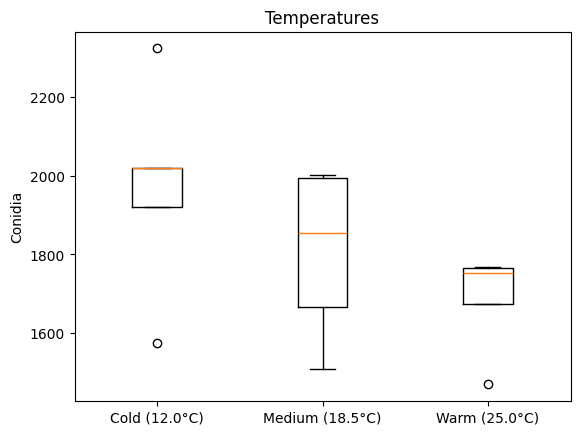

In [214]:
fig, ax = plt.subplots()
ax.boxplot([cold, medium, warm], labels=['Cold (12.0°C)', 'Medium (18.5°C)', 'Warm (25.0°C)'])
ax.set_ylabel('Conidia')
ax.set_title('Temperatures')
plt.show()

In [209]:
kruskal_stat, kruskal_p = kruskal(cold, medium, warm)
anova_stat, anova_p = f_oneway(cold, medium, warm)
print(f"P-value for Kruskal-Wallis test: {kruskal_p}")
print(f"P-value for One-way ANOVA: {anova_p}")

P-value for Kruskal-Wallis test: 0.1834399764898629
P-value for One-way ANOVA: 0.21782051320485535


In [210]:
# For cold vs hot
kruskal_stat, kruskal_p = kruskal(cold, warm)
anova_stat, anova_p = f_oneway(cold, warm)
print(f"P-value for Kruskal-Wallis test: {kruskal_p}")
print(f"P-value for One-way ANOVA: {anova_p}")

P-value for Kruskal-Wallis test: 0.08509993251567115
P-value for One-way ANOVA: 0.09929439587089374
